In [1]:
%matplotlib inline
from genetic_oscillator_benchmarking import *

## Properties

In [2]:
P = Atomic(var("x6") > 1)
P

Atomic(x6 > 1)

In [3]:
Q = Atomic(var("x4") < 1/125); Q

Atomic(x4 < 0.008)

In [66]:
I = RIF(1.5, 2)

## Concurrency

In [64]:
import concurrent.futures as fut

pool = fut.ProcessPoolExecutor(4)

thread_pool = fut.ThreadPoolExecutor(1000)

def restart_pool():
    global pool
    
    del pool
    pool = fut.ProcessPoolExecutor(4)

In [13]:
def benchmark_prop(prop, duration, **kwargs):
    agg_metric = instrumentation.AggregateMetric()
    tim, sig = test_monitoring(prop, duration,
                               instrumentor=agg_metric, **kwargs)
    return sig, tim, agg_metric

def schedule_test(prop, duration, **kwargs):
    return {
        'prop': prop,
        'duration': duration,
        'kwargs': kwargs,
        'future': pool.submit(
            benchmark_prop, prop, duration, **kwargs),
    }

from gi.repository import Notify
Notify.init("LBUC Benchmarking")

def notify_when_done(ress, task_description=None):
    fut.wait(futures(ress))
    
    if task_description is None:
        Notify.Notification.new("Benchmark run done!").show()
    else:
        Notify.Notification.new("Benchmark run done!",
                                task_description).show()

def futures(results):
    return [res['future'] for res in results]

def gen_results(n, *args, task_description=None, **kwargs):
    results = [
        schedule_test(*args, **kwargs)
            for _ in range(n)
    ]
    thread_pool.submit(notify_when_done, results, task_description)
    return results

## Launch Runs

In [83]:
num_runs = 5
duration = 2

In [67]:
results_unmasked = gen_results(
    num_runs,
    P & F(I, Q),
    duration,
    task_description='Unmasked P & F(Q)',
    use_masks=False,
    symbolic_composition=True,
)

/usr/lib64/python3.8/multiprocessing/queues.py:116: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _ForkingPickler.loads(res)
/usr/lib64/python3.8/multiprocessing/queues.py:116: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _ForkingPickler.loads(res)
/usr/lib64/python3.8/multiprocessing/queues.py:116: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _ForkingPickler.loads(res)
/usr/lib64/python3.8/multiprocessing/queues.py:116: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _ForkingPickler.loads(res)


calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1

seg_domain = [0.0000000000000000 .. 4.0020000000000007]
roots = [[0.73107619167936432 .. 0.94185785148114521]]
signal given bool roots: 1 items in 0.01 seconds
PolyObserver(-x4 + 0.0080000000000000002?, <flowstar.reachability.Reach object at 0x7fcc64a5e660>, -x2*x6 + 100*x4, symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
fprime = -x2*x6 + 100*x4
symbolic_composition=True, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 26.95 seconds
roots = [[1.7785693014472776 .. 2.1540000000000448]]
domain = [0.0000000000000000 .. 4.0020000000000007]
roots = [[1.7785693014472776 .. 2.1540000000000448]]
seg_domain = [0.0000000000000000 .. 4.0020000000000007]
roots = [[1.7785693014472776 .. 2.1540000000000448]]
signal given bool roots: 1 items in 0.01 seconds
ran "Precomposing Contexts" 1 times in 0.0007371902465820312
ran "restoring globals" 16 times in 0.0018956661224365234
ran "ca

top-level root detection: 1 items in 30.04 seconds
roots = [[1.7099999999998731 .. 1.7130000000000279], [1.7159999999998725 .. 1.7220000000000282], [1.7785693014472776 .. 2.1540000000000448]]
domain = [0.0000000000000000 .. 4.0020000000000007]
roots = [[1.7099999999998731 .. 1.7130000000000279], 
 [1.7159999999998725 .. 1.7220000000000282], 
 [1.7785693014472776 .. 2.1540000000000448]]
seg_domain = [0.0000000000000000 .. 4.0020000000000007]
roots = [[1.7099999999998731 .. 1.7130000000000279], 
 [1.7159999999998725 .. 1.7220000000000282], 
 [1.7785693014472776 .. 2.1540000000000448]]
signal given bool roots: 1 items in 0.02 seconds
ran "Precomposing Contexts" 1 times in 0.0021228790283203125
ran "restoring globals" 16 times in 0.0015664100646972656
ran "capturing globals [on exit]" 16 times in 0.0008070468902587891
ran "Running Flow*" 1 times in 47.71462798118591
ran "mask intersect check" 2668 times in 0.005645036697387695
ran "tentative eval" 2580 times in 2.775575637817383
ran "compo

fprime = -x2*x6 + 100*x4
symbolic_composition=True, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 27.17 seconds
roots = [[1.7785693014472776 .. 2.1540000000000448]]
domain = [0.0000000000000000 .. 4.0020000000000007]
roots = [[1.7785693014472776 .. 2.1540000000000448]]
seg_domain = [0.0000000000000000 .. 4.0020000000000007]
roots = [[1.7785693014472776 .. 2.1540000000000448]]
signal given bool roots: 1 items in 0.01 seconds
ran "Precomposing Contexts" 1 times in 3.981590270996094e-05
ran "restoring globals" 16 times in 0.001444101333618164
ran "capturing globals [on exit]" 16 times in 0.0007276535034179688
ran "Running Flow*" 1 times in 42.84366416931152
ran "mask intersect check" 2668 times in 0.0054836273193359375
ran "tentative eval" 2580 times in 2.8900532722473145
ran "composing flowpipe" 616 times in 29.07930898666382
ran "whole domain eval" 616 times in 1.3016493320465088
ran "post 

roots = [[1.7785693014472776 .. 2.1540000000000448]]
seg_domain = [1.5000000000000000 .. 2.9418578514811454]
roots = [[1.7785693014472776 .. 2.1540000000000448]]
seg_domain = [3.5020000000000002 .. 4.0020000000000007]
roots = [[1.7785693014472776 .. 2.1540000000000448]]
signal given bool roots: 1 items in 0.01 seconds
ran "Precomposing Contexts" 1 times in 3.886222839355469e-05
ran "restoring globals" 16 times in 0.001628875732421875
ran "capturing globals [on exit]" 16 times in 0.0007889270782470703
ran "Running Flow*" 1 times in 52.58645582199097
ran "mask intersect check" 2668 times in 0.008891820907592773
ran "tentative eval" 1317 times in 1.4361662864685059
ran "composing flowpipe" 464 times in 24.82951307296753
ran "whole domain eval" 463 times in 0.9448213577270508
ran "post retrieve" 414 times in 0.5499167442321777
ran "root detection" 414 times in 0.017266511917114258
ran "root amalgamation" 414 times in 0.0009548664093017578
ran "prepare in check" 5 times in 4.363059997558594

ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
top-level root detection: 1 items in 25.60 seconds
roots = [[1.7785693014472776 .. 2.1540000000000448]]
domain = [0.0000000000000000 .. 4.0020000000000007]
roots = [[1.7785693014472776 .. 2.1540000000000448]]
seg_domain = [1.5000000000000000 .. 2.9418578514811454]
roots = [[1.7785693014472776 .. 2.1540000000000448]]
seg_domain = [3.5020000000000002 .. 4.0020000000000007]
roots = [[1.7785693014472776 .. 2.1540000000000448]]
signal given bool roots: 1 items in 0.02 seconds
ran 

ran "post retrieve" 414 times in 0.5751368999481201
ran "root detection" 414 times in 0.017958402633666992
ran "root amalgamation" 414 times in 0.0010101795196533203
ran "prepare in check" 4 times in 3.409385681152344e-05
ran "check boolean [unguarded]" 4 times in 0.0013420581817626953
ran "observer.check" 4 times in 0.0016319751739501953
ran "Monitoring atomic x4 < 0.008" 1 times in 27.394365549087524
ran "Monitoring atomic x6 > 1" 1 times in 7.428691625595093
ran "Monitoring Signal for F([1.5000000000000000 .. 2.0000000000000000], x4 < 0.008) & x6 > 1" 1 times in 34.92306041717529
Run done in 82.04881381988525 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7fcc43d5b280>, 'use_masks': False, 'symbolic_composition': True}
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.07999999999

ran "mask intersect check" 2668 times in 0.005702972412109375
ran "tentative eval" 2228 times in 2.4999499320983887
ran "composing flowpipe" 968 times in 29.253194332122803
ran "whole domain eval" 968 times in 1.945169448852539
ran "post retrieve" 414 times in 0.5824475288391113
ran "root detection" 414 times in 0.019601821899414062
ran "root amalgamation" 414 times in 0.0010039806365966797
ran "prepare in check" 4 times in 3.933906555175781e-05
ran "check boolean [unguarded]" 4 times in 0.0015363693237304688
ran "observer.check" 4 times in 0.001913309097290039
ran "Monitoring atomic x4 < 0.008" 1 times in 26.731590032577515
ran "Monitoring atomic x6 > 1" 1 times in 7.705749273300171
ran "Monitoring Signal for F([1.5000000000000000 .. 2.0000000000000000], x4 < 0.008) & x6 > 1" 1 times in 34.5367534160614
Run done in 89.70848536491394 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7fcc43d4df00>, 'use_masks': False, 'symbolic_composition': True}
calli

ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
Computed 1334 flowpipes in 42.88956989401049 sec
PolyObserver(-x4 + 0.0080000000000000002?, <flowstar.reachability.Reach object at 0x7fcc43d2f740>, -x2*x6 + 100*x4, symbolic_composition=True, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 6.0020000000000007], [[1.5000000000000000 .. 4.0020000000000007]]))
fprime = -x2*x6 + 100*x4
symbolic_composition=True, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosi

symbolic_composition=True, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 22.22 seconds
roots = [[1.7785693014472776 .. 2.1540000000000448]]
domain = [0.0000000000000000 .. 4.0020000000000007]
roots = [[1.7785693014472776 .. 2.1540000000000448]]
seg_domain = [1.5000000000000000 .. 4.0020000000000007]
roots = [[1.7785693014472776 .. 2.1540000000000448]]
signal given bool roots: 1 items in 0.01 seconds
PolyObserver(x6 - 1, <flowstar.reachability.Reach object at 0x7fcc43d2f740>, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, symbolic_composition=True, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 2.5020000000000007], [[0.0000000000000000 .. 2.0020000000000007]]))
fprime = -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6
symbolic_composition=True, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domai

In [68]:
results_masked = gen_results(
    num_runs,
    P & F(I, Q),
    duration,
    task_description='Masked P & F(Q)',
    use_masks=True,
    symbolic_composition=True,
)

In [69]:
results_unmasked_reversed = gen_results(
    num_runs,
    F(I, Q) & P,
    duration,
    task_description='Unmasked F(Q) & P',
    use_masks=False,
    symbolic_composition=True,
)

In [70]:
results_masked_reversed = gen_results(
    num_runs,
    F(I, Q) & P,
    duration,
    task_description='Masked F(Q) & P',
    use_masks=True,
    symbolic_composition=True,
)

# Analysis

In [24]:
import pandas as pd

In [25]:
def total_time_for_key(inst, ks):
    if isinstance(ks, str):
        ks = [ks]

    return sum(inst.total_time(k)
               for k in ks)


def total_times(results, keys, keys_short=None):
    ress = [
        f.result() for f in futures(results)
    ]
    if keys_short is None:
        keys_short = keys
    data = pd.DataFrame({
        short_key: [total_time_for_key(r[2], key) for r in ress]
        for short_key, key in zip(keys_short, keys)
    })
    data.insert(len(keys), 'Total',
                [r[1] for r in ress])
    return data

In [26]:
results_unmasked[0]['future'].result()[2].events

['Precomposing Contexts',
 'restoring globals',
 'capturing globals [on exit]',
 'Running Flow*',
 'mask intersect check',
 'tentative eval',
 'composing flowpipe',
 'whole domain eval',
 'post retrieve',
 'root detection',
 'root amalgamation',
 'prepare in check',
 'check boolean [unguarded]',
 'observer.check',
 'Monitoring atomic x6 > 1',
 'Monitoring atomic x4 < 0.008',
 'Monitoring Signal for x6 > 1 & F([1.5000000000000000 .. 2.0000000000000000], x4 < 0.008)']

In [36]:
cols_full = [
    'Running Flow*',
    f'Monitoring atomic {P}',
    f'Monitoring atomic {Q}',
    [
        f'Monitoring Signal for {P & F(I, Q)}',
        f'Monitoring Signal for {F(I, Q) & P}',
    ],
    'tentative eval',
    'root detection',
    'composing flowpipe',
]
cols_short = [
    'Flow*', 'P', 'Q', 'P & F(Q)',
    'tentative eval',
    'root detection',
    'composing flowpipe',
]

## Raw results

In [76]:
times_unmasked = total_times(
    results_unmasked,
    cols_full,
    cols_short,
)
times_unmasked

,Flow*,P,Q,P & F(Q),tentative eval,root detection,composing flowpipe,Total
0,44.858815,6.326810,28.330106,36.561085,2.793774,0.018019,29.821321,81.568002
1,48.936634,6.095791,26.479739,34.389784,2.549640,0.017584,28.075426,83.480867
2,47.714628,5.876237,30.058918,37.737555,2.775576,0.018282,31.007801,85.579688
3,44.811466,7.406198,26.959213,36.200844,2.920581,0.017809,29.402982,81.158653
4,42.843664,6.824747,27.195108,34.105335,2.890053,0.017982,29.079309,77.083109


In [77]:
times_unmasked['Flow*'].std()

2.4546775578429716

In [78]:
times_masked = total_times(
    results_masked,
    cols_full,
    cols_short,
)
times_masked

,Flow*,P,Q,P & F(Q),tentative eval,root detection,composing flowpipe,Total
0,48.940053,6.608698,22.304927,29.005630,1.511477,0.017609,25.699090,78.073377
1,46.106651,5.821374,25.762958,31.678333,1.614742,0.018596,28.156699,77.909508
2,52.586456,5.008758,22.884891,27.981536,1.436166,0.017267,24.829513,80.697959
3,42.550449,5.118692,23.251796,28.468675,1.412190,0.017579,25.265916,71.155842
4,43.302812,5.719076,25.625137,31.429896,1.520799,0.018972,27.977450,74.852352


In [79]:
times_masked['Flow*'].std()

4.146681793739429

## Comparison

In [71]:
series = ['masked', 'unmasked',
          'masked_reversed', 'unmasked_reversed']
total_timess = {
    s: total_times(eval(f'results_{s}'), cols_full, cols_short)
    for s in series 
}

In [72]:
comparison = pd.DataFrame({
    s: total_times.mean()
    for s, total_times in total_timess.items()
})

In [73]:
comparison

,masked,unmasked,masked_reversed,unmasked_reversed
Flow*,46.697284,45.833041,44.620064,49.778803
P,5.655320,6.505956,5.054598,6.983469
Q,23.965942,27.804617,23.613771,26.818460
P & F(Q),29.712814,35.798920,28.765923,33.895764
tentative eval,1.499075,2.785925,1.371837,2.422705
root detection,0.018004,0.017935,0.017676,0.017917
composing flowpipe,26.385734,29.477368,25.310442,28.626405
Total,76.537808,81.774064,73.513989,83.808036


In [74]:
comparison2 = comparison.loc[['P', 'Q'],:].transpose()
comparison2

,P,Q
masked,5.655320,23.965942
unmasked,6.505956,27.804617
masked_reversed,5.054598,23.613771
unmasked_reversed,6.983469,26.818460


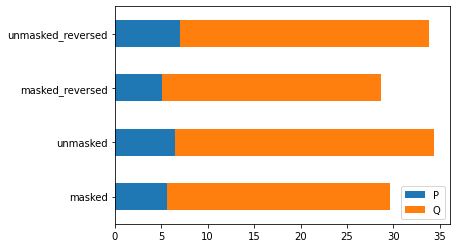

In [75]:
comparison2.plot(kind='barh', stacked=True)

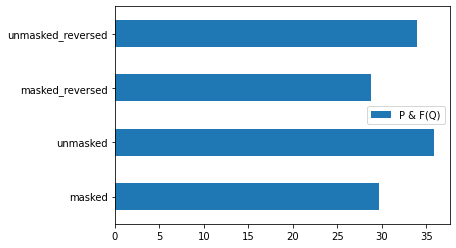

In [81]:
comparison3 = comparison.loc[['P & F(Q)'],:].transpose()
comparison3.plot(kind='barh')

In [82]:
restart_pool()